In [1]:
import os
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img

# Define directories
original_dir = 'C:/Users/varun/Minor Project/gamma_adjusted_images/tb_gamma_adjusted'  # Update to your images folder
augmented_dir = 'C:/Users/varun/Minor Project/traditional_data_augment'  # The new folder where original + augmented images will be stored
os.makedirs(augmented_dir, exist_ok=True)

# Image Augmentation Setup
datagen = ImageDataGenerator(
    rotation_range=20,   # Random rotations
    width_shift_range=0.2,  # Horizontal shifts
    height_shift_range=0.2,  # Vertical shifts
    shear_range=0.15,     # Shear transformations
    zoom_range=0.2,       # Random zoom
    horizontal_flip=True,  # Horizontal flips
    fill_mode='nearest'   # Filling strategy for missing pixels
)

# Function to copy original images to the augmented folder
def copy_original_images(src_dir, dst_dir):
    for img_name in os.listdir(src_dir):
        src_path = os.path.join(src_dir, img_name)
        dst_path = os.path.join(dst_dir, img_name)
        shutil.copy(src_path, dst_path)  # Copy original image

# Function to augment and save images
def augment_and_save_images(image_dir, save_dir, augment_count=5):
    for img_name in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_name)
        
        # Load the image and convert to an array
        img = load_img(img_path)
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Reshape for the generator
        
        # Generate and save augmented images
        i = 0
        for batch in datagen.flow(img_array, batch_size=1, save_to_dir=save_dir, 
                                  save_prefix='augmented', save_format='png'):
            i += 1
            if i >= augment_count:
                break  # Stop after generating 'augment_count' images

# Copy original images to the new folder
copy_original_images(original_dir, augmented_dir)

# Augment and save new images into the new folder
augment_and_save_images(original_dir, augmented_dir, augment_count=6)  # Create 5 augmented versions of each image


In [2]:
import os
import matplotlib.pyplot as plt

# Define the paths to your folders
normal_dir = 'C:/Users/varun/Minor Project/gamma_adjusted_images/normal_gamma_adjusted'  # Update to the correct path
tb_dir = 'C:/Users/varun/Minor Project/gamma_adjusted_images/tb_gamma_adjusted'  # Update to the correct path

traditional_tb_dir='C:/Users/varun/Minor Project/traditional_data_augment'

gan_tb_dir='C:/Users/varun/Minor Project/XRayNormalFake3'

# Function to count images in a folder
def count_images_in_folder(folder):
    return len([file for file in os.listdir(folder) if file.lower().endswith(('.png', '.jpg', '.jpeg'))])

# Count the images in each folder
normal_count = count_images_in_folder(normal_dir)
tb_count = count_images_in_folder(tb_dir)
traditional_tb_count = count_images_in_folder(traditional_tb_dir)
gan_tb_count = count_images_in_folder(gan_tb_dir)

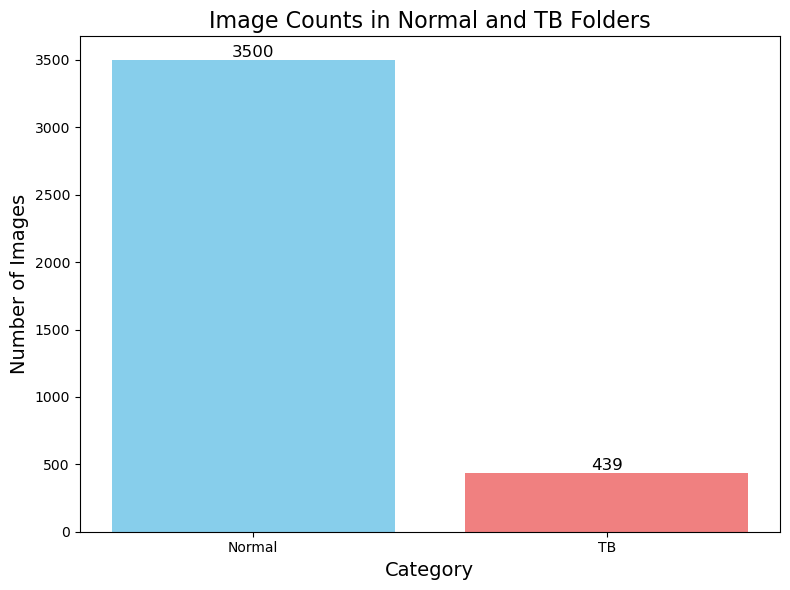

In [4]:
# Data for the plot
categories = ['Normal', 'TB']
counts = [normal_count, tb_count]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, counts, color=['skyblue', 'lightcoral'])

# Annotate the bars with the counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval), va='bottom', ha='center', fontsize=12)

# Add labels and title
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.title('Image Counts in Normal and TB Folders', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

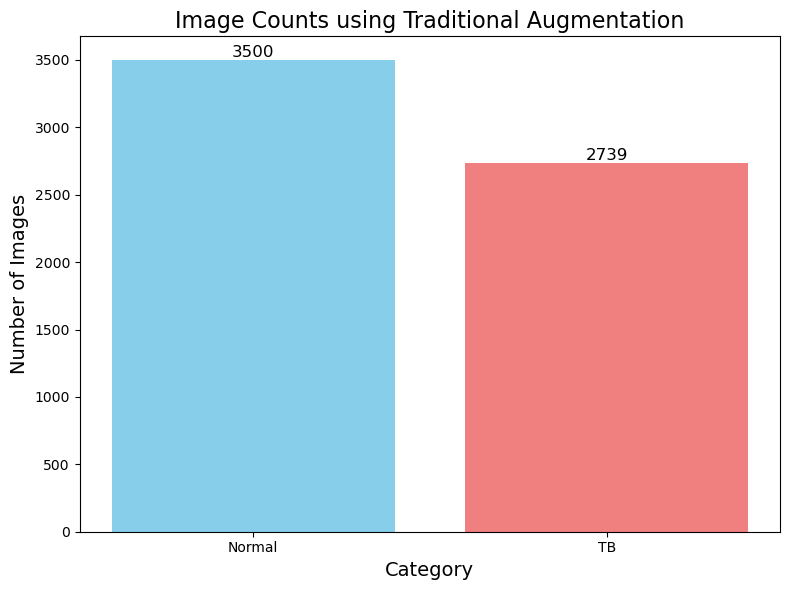

In [5]:
# Data for the plot
categories = ['Normal', 'TB']
counts = [normal_count, traditional_tb_count]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, counts, color=['skyblue', 'lightcoral'])

# Annotate the bars with the counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval), va='bottom', ha='center', fontsize=12)

# Add labels and title
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.title('Image Counts using Traditional Augmentation', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

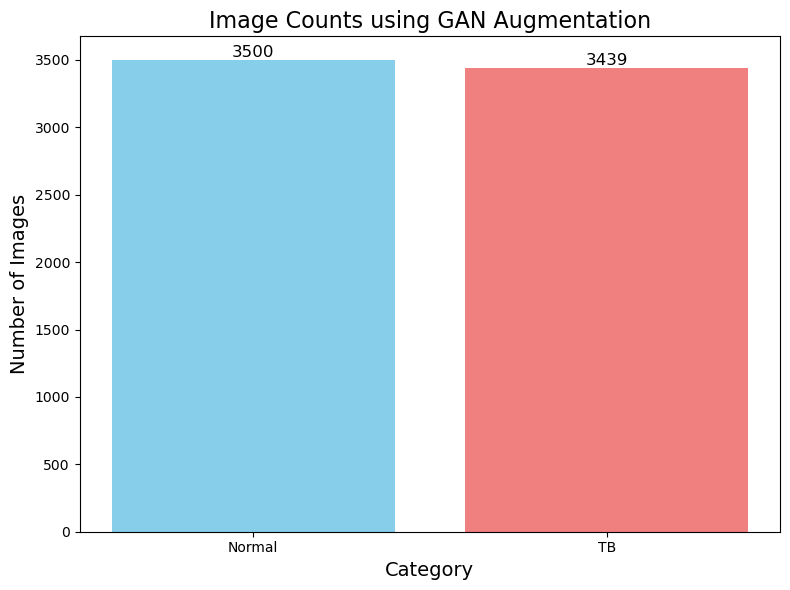

In [6]:
# Data for the plot
categories = ['Normal', 'TB']
counts = [normal_count, gan_tb_count]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, counts, color=['skyblue', 'lightcoral'])

# Annotate the bars with the counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval), va='bottom', ha='center', fontsize=12)

# Add labels and title
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.title('Image Counts using GAN Augmentation', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

In [3]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Function to extract HOG features from an image
def extract_hog_features(image, resize_dim=(128, 128)):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize image to a standard size
    resized_image = cv2.resize(gray_image, resize_dim)
    # Extract HOG features
    hog_features, hog_image = hog(resized_image, orientations=9, pixels_per_cell=(8, 8),
                                  cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)
    return hog_features

# Function to load images and extract HOG features
def load_images_and_extract_hog(folder, label):
    features = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        image = cv2.imread(img_path)
        if image is not None:
            hog_features = extract_hog_features(image)
            features.append(hog_features)
            labels.append(label)
    return features, labels


In [4]:
# Load and process Normal images
normal_features, normal_labels = load_images_and_extract_hog(normal_dir, label=0)  # Label '0' for Normal

# Load and process TB images
tb_features, tb_labels = load_images_and_extract_hog(tb_dir, label=1)  # Label '1' for TBtrad_tb, trad_labels = 

trad_tb, trad_labels = load_images_and_extract_hog(traditional_tb_dir, label=1)

gan_tb,gan_labels = load_images_and_extract_hog(gan_tb_dir, label=1)

# Combine features and labels from both classes
X1 = np.array(normal_features + tb_features)  # Features
y1 = np.array(normal_labels + tb_labels)      # Labels

X2 = np.array(normal_features + trad_tb)  # Features
y2 = np.array(normal_labels + trad_labels)      # Labels

X3 = np.array(normal_features + gan_tb)  # Features
y3 = np.array(normal_labels + gan_labels)      # Labels

# Split data into training and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [6]:
import numpy as np

combined_data_noaug = np.column_stack((X1, y1))
combined_data_tradaug = np.column_stack((X2, y2))
combined_data_ganaug = np.column_stack((X3, y3))

csv_file_path = 'NOaug.csv'
np.savetxt(csv_file_path, combined_data_noaug, delimiter=',', header='Features,Label', comments='')
csv_file_path = 'tradaug.csv'
np.savetxt(csv_file_path, combined_data_tradaug, delimiter=',', header='Features,Label', comments='')
csv_file_path = 'ganaug.csv'
np.savetxt(csv_file_path, combined_data_ganaug, delimiter=',', header='Features,Label', comments='')


print("Data saved")


Data saved


In [8]:
# Load and process Normal images
normal_features, normal_labels = load_images_and_extract_hog(normal_dir, label=0)

gan_tb,gan_labels = load_images_and_extract_hog(gan_tb_dir, label=1)

X3 = np.array(normal_features + gan_tb)        # Features
y3 = np.array(normal_labels + gan_labels)      # Labels

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [10]:
X3.shape,y3.shape

((6939, 8100), (6939,))

In [7]:
# Initialize and train the Random Forest classifier
rf1_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf1_classifier.fit(X1_train, y1_train)

# Make predictions on the test set
y1_pred = rf1_classifier.predict(X1_test)

# Evaluate the classifier
accuracy = accuracy_score(y1_test, y1_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print("\nClassification Report:")
print(classification_report(y1_test, y1_pred, target_names=['Normal', 'TB']))

Accuracy: 93.40%

Classification Report:
              precision    recall  f1-score   support

      Normal       0.93      1.00      0.96       709
          TB       1.00      0.34      0.51        79

    accuracy                           0.93       788
   macro avg       0.97      0.67      0.74       788
weighted avg       0.94      0.93      0.92       788



In [8]:
rf2_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf2_classifier.fit(X2_train, y2_train)

# Make predictions on the test set
y2_pred = rf2_classifier.predict(X2_test)

# Evaluate the classifier
accuracy = accuracy_score(y2_test, y2_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print("\nClassification Report:")
print(classification_report(y2_test, y2_pred, target_names=['Normal', 'TB']))

Accuracy: 94.15%

Classification Report:
              precision    recall  f1-score   support

      Normal       0.93      0.97      0.95       723
          TB       0.96      0.90      0.93       525

    accuracy                           0.94      1248
   macro avg       0.94      0.94      0.94      1248
weighted avg       0.94      0.94      0.94      1248



In [9]:
rf3_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf3_classifier.fit(X3_train, y3_train)

# Make predictions on the test set
y3_pred = rf3_classifier.predict(X3_test)

# Evaluate the classifier
accuracy = accuracy_score(y3_test, y3_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print("\nClassification Report:")
print(classification_report(y3_test, y3_pred, target_names=['Normal', 'TB']))

Accuracy: 95.17%

Classification Report:
              precision    recall  f1-score   support

      Normal       0.94      0.98      0.96       732
          TB       0.97      0.93      0.95       656

    accuracy                           0.95      1388
   macro avg       0.95      0.95      0.95      1388
weighted avg       0.95      0.95      0.95      1388



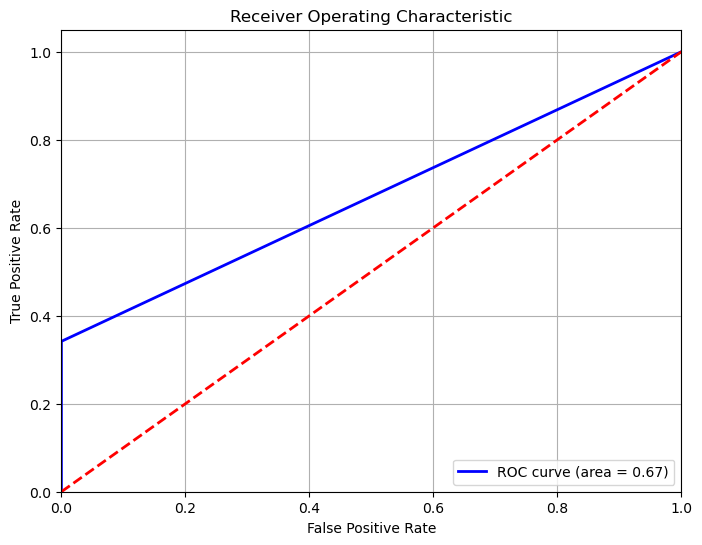

In [12]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y1_test, y1_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

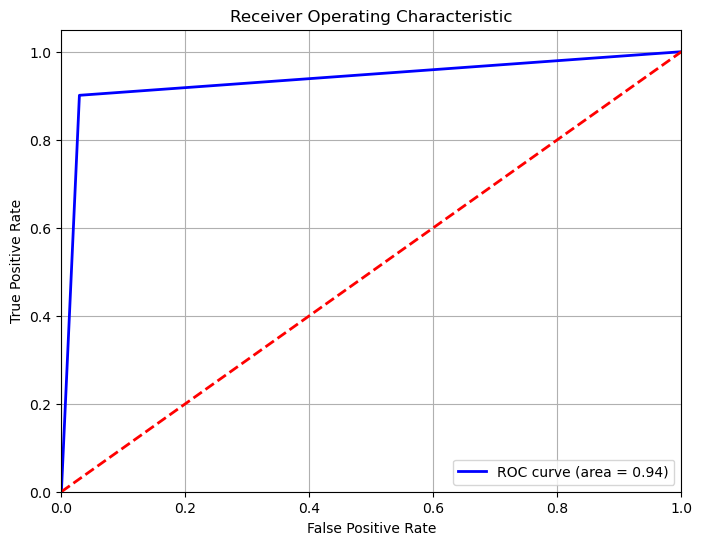

In [13]:
fpr, tpr, thresholds = roc_curve(y2_test, y2_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

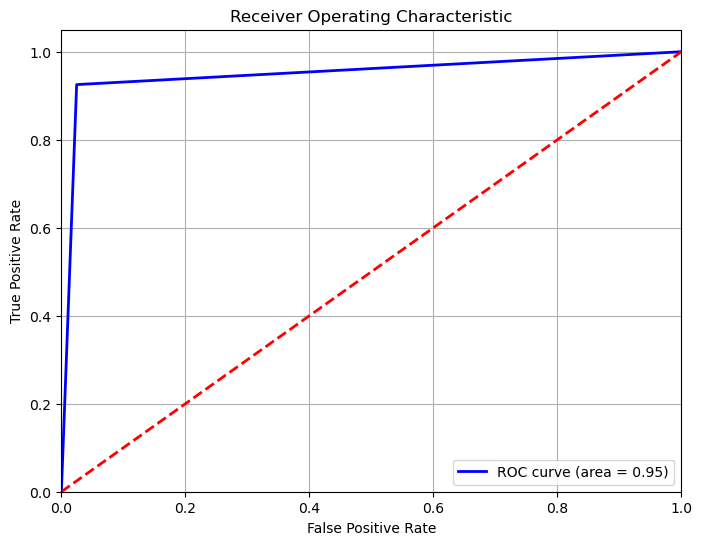

In [10]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y3_test, y3_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.feature import hog
from lime import lime_image
from skimage.segmentation import mark_boundaries
import cv2

def extract_hog_features(image):
    # Convert image to grayscale (HOG works on grayscale images)
    gray_image = rgb2gray(image)
    
    # Extract HOG features and HOG image (for visualization)
    hog_features, hog_image = hog(
        gray_image, 
        pixels_per_cell=(16, 16),  # Match the parameters used during training
        cells_per_block=(2, 2),    # Match the parameters used during training
        block_norm='L2-Hys',
        visualize=True,
        feature_vector=True
    )
    return hog_features, hog_image

# Custom function for LIME to handle HOG features
def predict_proba_hog(image_batch):
    hog_feature_batch = []
    for image_instance in image_batch:
        hog_features, _ = extract_hog_features(image_instance)
        hog_feature_batch.append(hog_features)
    
    # Convert to numpy array and predict using the RandomForestClassifier
    hog_feature_batch = np.array(hog_feature_batch)
    return rf3_classifier.predict_proba(hog_feature_batch)

# Load your image from the specified path
image_path = r"C:\Users\varun\Minor Project\XRayNormalFake3\Tuberculosis-46.png"
image_instance = cv2.imread(image_path)
image_instance = cv2.cvtColor(image_instance, cv2.COLOR_BGR2RGB)

# Resize the image to match the size used during training (assuming 256x256)
image_instance = cv2.resize(image_instance, (128, 128))  # Match the size used during training

# Create a LIME explainer for images
explainer = lime_image.LimeImageExplainer()

# Explain the image instance using HOG features
explanation = explainer.explain_instance(
    image_instance, 
    predict_proba_hog,  # Use custom function to handle HOG features
    top_labels=1, 
    hide_color=0, 
    num_samples=100  # Reduce the number of perturbations
)

# Get the image and mask for the top predicted label
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0], 
    positive_only=True, 
    num_features=5,  # Limit the number of features
    hide_rest=False
)

# Plot the explanation heatmap on top of the HOG image
_, hog_image = extract_hog_features(image_instance)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(hog_image, cmap='gray')
plt.title("HOG Features")
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title("LIME Heatmap for TB Prediction")
plt.show()


In [11]:
from joblib import dump, load

In [12]:
model_file_path = 'nogan_random_forest_model.joblib'
dump(rf1_classifier, model_file_path)

['nogan_random_forest_model.joblib']

In [13]:
model_file_path = 'tradaug_random_forest_model.joblib'
dump(rf2_classifier, model_file_path)

['tradaug_random_forest_model.joblib']

In [14]:
model_file_path = 'ganaug_random_forest_model.joblib'
dump(rf3_classifier, model_file_path)

['ganaug_random_forest_model.joblib']

In [ ]:
loaded_model = load(model_file_path)